## Observations and Insights 

In [62]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouseMetaPath = "data/Mouse_metadata.csv"
studyResultsPath = "data/Study_results.csv"

# Read the mouse data and the study results
mouseData = pd.read_csv(mouseMetaPath)
studyResults = pd.read_csv(studyResultsPath)

# Combine the data into a single dataset
combined_df = pd.merge(mouseData, studyResults, how="left", on="Mouse ID")
combined_df 

# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [63]:
countMouse = combined_df["Mouse ID"].nunique()
countMouse

249

In [64]:
dupRows = combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
dupRows


array(['g989'], dtype=object)

In [65]:
allRowsDupl = combined_df.loc[combined_df["Mouse ID"] == "g989"]
allRowsDupl


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [66]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df[combined_df['Mouse ID'].isin(duplicate_rows)==False]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [67]:
# Checking the number of mice in the clean DataFrame.
countMice = clean_df['Mouse ID'].nunique()
countMice

248

## Summary Statistics

In [68]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
drugRegGroup = clean_df.groupby("Drug Regimen")
print(drugRegGroup["Mouse ID"].count())
mean = drugRegGroup['Tumor Volume (mm3)'].mean()
median = drugRegGroup['Tumor Volume (mm3)'].median()
variance = drugRegGroup['Tumor Volume (mm3)'].var()
standard_dv =drugRegGroup['Tumor Volume (mm3)'].std()
sem =drugRegGroup['Tumor Volume (mm3)'].sem()


Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64


In [69]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
agg = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean','median','var','std','sem'])
agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'The number of mice tested')

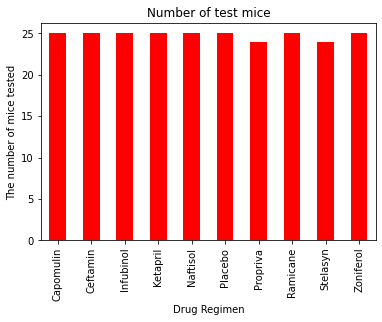

In [70]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
miceData = clean_df.groupby(["Drug Regimen"])["Mouse ID"].nunique()
ax = miceData.plot(kind="bar",title ="Number of test mice",facecolor="red")
ax.set_ylabel("The number of mice tested")


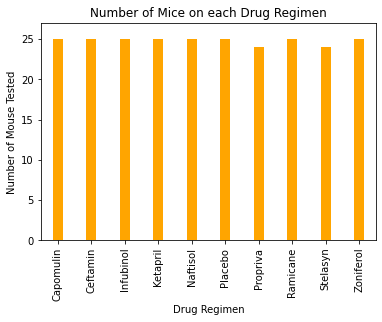

In [71]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
reg = clean_df.groupby("Drug Regimen")["Mouse ID"].nunique()
x_axis = np.arange(0, len(reg))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)
plt.title("Number of Mice on each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mouse Tested")

plt.xlim(-0.5, len(mice_data)-0.5)
plt.ylim(0,mice_data.max() +2)

plt.bar(reg.index, reg, facecolor="orange", width=0.3)
plt.xticks(tick_locations, reg.index,rotation="vertical")
plt.show()

Male      125
Female    123
Name: Sex, dtype: int64

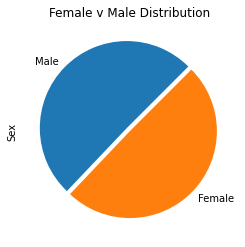

In [72]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

genderofMouse = clean_df[["Mouse ID", "Sex"]].drop_duplicates()

colors = ["blue","orange"]
explode=(0.05,0)

sexDistr = genderofMouse["Sex"].value_counts()
s = sexDistr.plot(kind="pie", title="Female v Male Distribution", startangle=45, explode=explode)
sexDistr

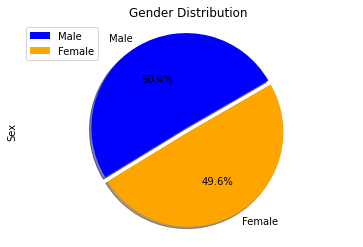

In [73]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(sex_distribution, labels=sex_distribution.index,colors=colors,autopct="%1.1f%%", shadow=True, startangle=30, explode=explode)
plt.axis("equal")
plt.ylabel("Sex")
plt.legend(loc= "upper left")
plt.title("Gender Distribution")
plt.show()

## Quartiles, Outliers and Boxplots

In [74]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
timepoint = clean_df.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
volumeFrame = pd.merge(clean_df, timepoint, how="inner", on=["Mouse ID", "Timepoint"])


In [75]:
# Put treatments into a list for for loop (and later for plot labels)
drugList = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumors = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Determine outliers using upper and lower bounds
for drug in drugList:
    volDF = vol_df.loc[vol_df["Drug Regimen"]==drug]["Tumor Volume (mm3)"]
    tumors.append(volDF)
    quartiles = volDF.quantile([0.25,0.5,0.75])
    iqr = quartiles[0.75] - quartiles[0.25]
    lower = quartiles[0.25] - (1.5*iqr)
    upper = quartiles[0.75] + (1.5*iqr)

    outliers = volDF.loc[(volDF > upper) | (volDF < lower)]

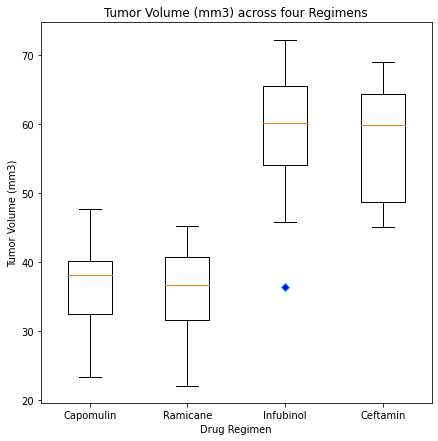

In [76]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
blueDots = dict(markerfacecolor="b",marker="D", markeredgecolor="c")
fig1, ax1 = plt.subplots(figsize=(7,7))
ax1.boxplot(tumor_vol, flierprops=blueDots)
ax1.set_title("Tumor Volume (mm3) across four Regimens")
ax1.set_xlabel("Drug Regimen")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.xaxis.set(ticks=range(1,len(list_of_drugs) + 1),ticklabels=list_of_drugs)

plt.show()

## Line and Scatter Plots

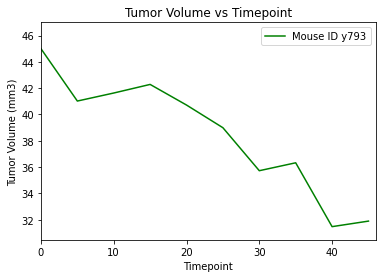

In [77]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
ranMouse = (clean_df[clean_df["Drug Regimen"]=="Capomulin"]).sample()
ranData = pd.merge(clean_df, ranMouse, on="Mouse ID", how="inner")
ranDF = ranData.drop([col for col in ranData.columns if '_y' in col], axis=1)
time = ranDF["Timepoint_x"]
vol = ranDF["Tumor Volume (mm3)_x"]
label = ranDF["Mouse ID"].unique()

#print(ranMouse["Mouse ID"])

line, = plt.plot(time, vol, 'g-')
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume vs Timepoint")
plt.xlim(0, time.max() + 1)
plt.ylim(vol.min() - 1, vol.max() + 2)
plt.legend("Mouse ID " +label)
plt.show()

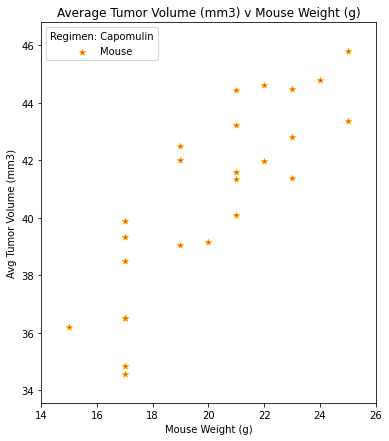

In [83]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
regimen = clean_df.loc[clean_df["Drug Regimen"]== "Capomulin"]
tvolume = regimen.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()
mouseWeight = regimen.groupby(["Mouse ID"])["Weight (g)"].mean()
mouseVolume = pd.merge(tvolume,mouseWeight, on="Mouse ID", how="inner")
vol = mouseVolume.iloc[:,0]
wt = mouseVolume.iloc[:,1]

fig, ax = plt.subplots(figsize=(6,7))
ax.scatter(wt, vol, marker="*", facecolors="red", edgecolors="orange")
ax.legend(["Mouse"],loc="upper left", title="Regimen: Capomulin")
plt.title("Average Tumor Volume (mm3) v Mouse Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.xlabel("Mouse Weight (g)")
plt.ylim(vol.min() - 1, vol.max() + 1)
plt.xlim(wt.min() - 1, wt.max() + 1)

plt.show()

## Correlation and Regression

In [84]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = round(st.pearsonr(wt, vol)[0],2)
print(f"The correlation coefficient between Average Tumor Volume and Mouse Weight is {correlation}")

The correlation coefficient between Average Tumor Volume and Mouse Weight is 0.84
